In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

d:\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the training set
df = pd.read_csv(r'.\gamified_dataset/Dyt-desktop.csv')

print("#-----> First 5 rows of the training set:\n")
df.head(5)

#-----> First 5 rows of the training set:



,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1.0,0.0,...,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,No
1,Female,Yes,Yes,13,12,12,0,12,1.0,0.0,...,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,Yes
2,Female,No,Yes,7,6,6,0,6,1.0,0.0,...,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0.0,0.0,...,0,0.000000,0.00,1,0,0,0,0.000000,0.000000,No
4,Female,No,Yes,8,4,4,0,4,1.0,0.0,...,1,25.000000,0.05,26,2,2,2,0.076923,0.076923,No


In [26]:
df=df.drop(columns = ['Otherlang'])

In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum(), "\n")

# Check for duplicates
print("Duplicate values:\n", df.duplicated().sum())

Missing values:
 Gender        0
Nativelang    0
Otherlang     0
Age           0
Clicks1       0
             ..
Misses32      0
Score32       0
Accuracy32    0
Missrate32    0
Dyslexia      0
Length: 197, dtype: int64 

Duplicate values:
 0


In [27]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Nativelang'] = label_encoder.fit_transform(df['Nativelang'])
df['Dyslexia'] = label_encoder.fit_transform(df['Dyslexia'])

In [28]:
X_features = df.drop(['Dyslexia'], axis=1)
y_target = df['Dyslexia']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42,stratify=y_target)

In [30]:
X_train

,Gender,Nativelang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,...,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32
1782,1,0,10,0,0,0,0,0.000000,0.000000,2,...,1,1,0.028571,0.028571,25,2,1,2,0.080000,0.040000
2156,0,0,7,4,4,0,4,1.000000,0.000000,5,...,0,1,0.058824,0.000000,24,2,1,2,0.083333,0.041667
848,1,0,13,6,1,1,1,0.166667,0.166667,9,...,0,4,0.114286,0.000000,17,0,4,0,0.000000,0.235294
2994,0,0,7,8,7,1,7,875.000000,125.000000,7,...,1,1,0.040000,0.040000,7,0,0,0,0.000000,0.000000
3269,1,0,14,18,18,0,18,1.000000,0.000000,17,...,0,4,0.114286,0.000000,26,3,1,3,0.115385,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,0,0,9,7,6,1,6,0.857143,0.142857,8,...,1,2,0.058824,0.029412,26,3,1,3,0.115385,0.038462
2952,0,0,10,9,9,0,9,1.000000,0.000000,10,...,0,4,0.114286,0.000000,26,3,1,3,0.115385,0.038462
64,1,1,11,5,0,2,0,0.000000,0.400000,9,...,1,3,0.069767,0.023256,17,2,2,2,0.117647,0.117647
2304,1,0,13,7,1,1,1,0.142857,0.142857,16,...,0,4,0.114286,0.000000,17,2,2,8,0.117647,0.117647


In [9]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [18]:
X_train

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32
1782,1,No,Yes,10,0,0,0,0,0.000000,0.000000,...,1,1,0.028571,0.028571,25,2,1,2,0.080000,0.040000
2156,0,No,Yes,7,4,4,0,4,1.000000,0.000000,...,0,1,0.058824,0.000000,24,2,1,2,0.083333,0.041667
848,1,No,Yes,13,6,1,1,1,0.166667,0.166667,...,0,4,0.114286,0.000000,17,0,4,0,0.000000,0.235294
2994,0,No,Yes,7,8,7,1,7,875.000000,125.000000,...,1,1,0.040000,0.040000,7,0,0,0,0.000000,0.000000
3269,1,No,No,14,18,18,0,18,1.000000,0.000000,...,0,4,0.114286,0.000000,26,3,1,3,0.115385,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,0,No,Yes,9,7,6,1,6,0.857143,0.142857,...,1,2,0.058824,0.029412,26,3,1,3,0.115385,0.038462
2952,0,No,Yes,10,9,9,0,9,1.000000,0.000000,...,0,4,0.114286,0.000000,26,3,1,3,0.115385,0.038462
64,1,Yes,Yes,11,5,0,2,0,0.000000,0.400000,...,1,3,0.069767,0.023256,17,2,2,2,0.117647,0.117647
2304,1,No,Yes,13,7,1,1,1,0.142857,0.142857,...,0,4,0.114286,0.000000,17,2,2,8,0.117647,0.117647


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

# rf_classifier.fit(X_train, y_train)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


d:\apps n shit\programming\Python\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\apps n shit\programming\Python\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\apps n shit\programming\Python\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

In [13]:
print(best_params)
print(best_rf_model)

{'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=50)


In [16]:
from sklearn.metrics import accuracy_score, classification_report

# # Make predictions on the testing data
# y_pred = rf_classifier.predict(X_test)
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=50)

rf_classifier.fit(X_train, y_train)
# Make predictions on the test set using the best model
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy:.2f}")

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Best Hyperparameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 0.90
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       651
           1       0.59      0.28      0.38        78

    accuracy                           0.90       729
   macro avg       0.76      0.63      0.66       729
weighted avg       0.88      0.90      0.89       729



In [25]:
X_train

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32
1782,1,0,Yes,10,0,0,0,0,0.000000,0.000000,...,1,1,0.028571,0.028571,25,2,1,2,0.080000,0.040000
2156,0,0,Yes,7,4,4,0,4,1.000000,0.000000,...,0,1,0.058824,0.000000,24,2,1,2,0.083333,0.041667
848,1,0,Yes,13,6,1,1,1,0.166667,0.166667,...,0,4,0.114286,0.000000,17,0,4,0,0.000000,0.235294
2994,0,0,Yes,7,8,7,1,7,875.000000,125.000000,...,1,1,0.040000,0.040000,7,0,0,0,0.000000,0.000000
3269,1,0,No,14,18,18,0,18,1.000000,0.000000,...,0,4,0.114286,0.000000,26,3,1,3,0.115385,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,0,0,Yes,9,7,6,1,6,0.857143,0.142857,...,1,2,0.058824,0.029412,26,3,1,3,0.115385,0.038462
2952,0,0,Yes,10,9,9,0,9,1.000000,0.000000,...,0,4,0.114286,0.000000,26,3,1,3,0.115385,0.038462
64,1,1,Yes,11,5,0,2,0,0.000000,0.400000,...,1,3,0.069767,0.023256,17,2,2,2,0.117647,0.117647
2304,1,0,Yes,13,7,1,1,1,0.142857,0.142857,...,0,4,0.114286,0.000000,17,2,2,8,0.117647,0.117647


Accuracy on Test Set: 0.91
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       651
           1       0.69      0.28      0.40        78

    accuracy                           0.91       729
   macro avg       0.80      0.63      0.68       729
weighted avg       0.89      0.91      0.89       729



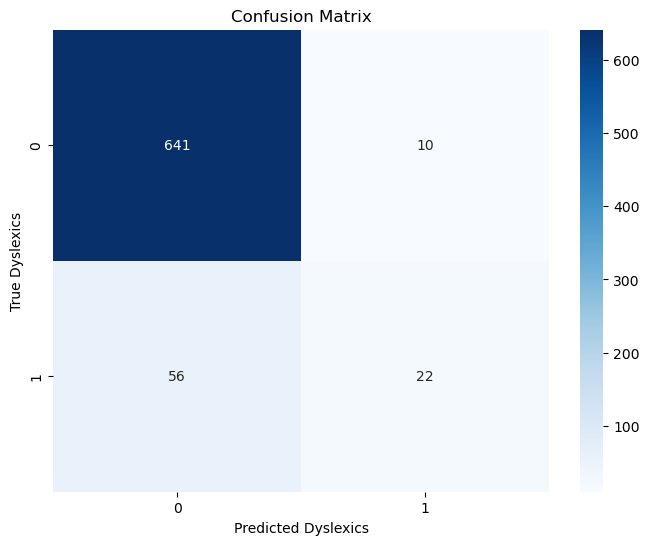

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Make predictions on the testing data
# y_pred = rf_classifier.predict(X_test)
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='auto', min_samples_leaf=4,
                       n_estimators=50)

rf_classifier.fit(X_train, y_train)
# Make predictions on the test set using the best model
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy:.2f}")

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Dyslexics')
plt.ylabel('True Dyslexics')
plt.title('Confusion Matrix')
plt.show()